# Download the data from the above link. How many ".csv" files are available in the dataset?

In [4]:
import os

folders = "/content/drive/MyDrive/movie_data"
csv = [file for file in os.listdir(folders) if file.endswith('.csv')]
num_csv = len(csv)
print(f"The number of  csv file: {num_csv}")


The number of  csv file: 4


# What is the shape of "movies.csv"?


In [5]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/movie_data/movies.csv')
df.shape

(9742, 3)

In [14]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
df.columns

Index(['movieId', 'title', 'genres'], dtype='object')

# What is the shape of "ratings.csv"?


In [6]:
df1=pd.read_csv('/content/drive/MyDrive/movie_data/ratings.csv')
df1.shape

(100836, 4)

# How many unique "userId" are available in "ratings.csv"?


In [7]:
df1.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [9]:
df1['userId'].nunique()

610

In [12]:
df2=pd.read_csv('/content/drive/MyDrive/movie_data/links.csv')
df2.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


# Which movie has recieved maximum number of user ratings?

In [17]:
df_merged = df1.merge(df, on='movieId')

In [20]:
rated_flim= df_merged.groupby('title')['rating'].count().sort_values(ascending=False)

In [22]:
most_rated_flim = rated_flim.index[0]
print(f"The maximum rated movie: {most_rated_flim}")

The maximum rated movie: Forrest Gump (1994)


In [23]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
df1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [25]:
df2.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


#df=movie
#df1=rating
#df2=links
#df3=> tags

In [27]:
df3=pd.read_csv('/content/drive/MyDrive/movie_data/tags.csv')
df3.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [29]:
df.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [30]:
df1.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [31]:
df2.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [32]:
df3.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [35]:
import pandas as pd
merged = df.merge(df3, on='movieId')
matrix_tags = merged[merged['title'] == 'Matrix, The (1999)']['tag']
print(f"Correct tags for 'Matrix,: {(matrix_tags)}")


Correct tags for 'Matrix,: 1313          martial arts
1314                sci-fi
1315    alternate universe
1316            philosophy
1317      post apocalyptic
Name: tag, dtype: object


# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [38]:
merged = df.merge(df1, on='movieId')
ratings = merged[merged['title'] == 'Terminator 2: Judgment Day (1991)']['rating']
avg_ratings = ratings.mean()
print(f"Average user rating for two: {avg_ratings:.2f}")

Average user rating for two: 3.97


# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [40]:
import matplotlib.pyplot as plt


<Axes: ylabel='Frequency'>

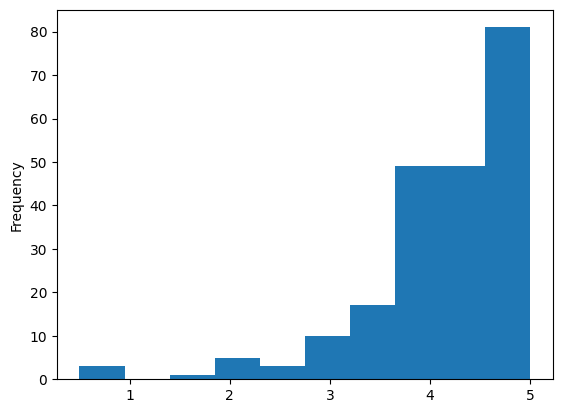

In [45]:
pd.merge(df,df1,on="movieId")[pd.merge(df,df1,on="movieId")["title"]=="Fight Club (1999)"]['rating'].plot(kind="hist")

# Which movie is the most popular based on  average user ratings?
*
# Answer this question only after applying the above mentioned "Mandatory Operration".

In [55]:
groupby_rating = df1.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
groupby_rating.columns = ['movieId', 'rating_count', 'rating_mean']
data = pd.merge(df, groupby_rating, on='movieId', how='inner')
filter_data = data[data['rating_count'] > 50]

In [56]:
filter_data[['title','rating_mean']].sort_values(by = 'rating_mean',ascending = False)

,title,rating_mean
277,"Shawshank Redemption, The (1994)",4.429022
659,"Godfather, The (1972)",4.289062
2224,Fight Club (1999),4.272936
974,Cool Hand Luke (1967),4.271930
602,Dr. Strangelove or: How I Learned to Stop Worr...,4.268041
...,...,...
144,Johnny Mnemonic (1995),2.679245
145,Judge Dredd (1995),2.669355
376,City Slickers II: The Legend of Curly's Gold (...,2.645455
379,Coneheads (1993),2.420635


In [58]:
filter_data.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


# Select all the correct options which comes under top 5 popular movies based on number of user ratings.
*
# Answer this question only after applying the above mentioned "Mandatory Operration".

In [63]:
filter_data[['title','rating_count']].sort_values(by = 'rating_count',ascending = False)

,title,rating_count
314,Forrest Gump (1994),329
277,"Shawshank Redemption, The (1994)",317
257,Pulp Fiction (1994),307
510,"Silence of the Lambs, The (1991)",279
1938,"Matrix, The (1999)",278
...,...,...
3147,Blow (2001),51
3490,Training Day (2001),51
3539,Mulholland Drive (2001),51
118,Bad Boys (1995),51


# Which Sci-Fi movie is "third most popular" based on the number of user ratings?
*
# Answer this question only after applying the above mentioned "Mandatory Operration".

In [68]:
scifi_flim = filter_data[filter_data['genres'].str.contains('Sci-Fi', case=False)]

sorted_scifi_flim = scifi_flim.sort_values(by='rating_count', ascending=False)

most_popular_scifi = sorted_scifi_flim.iloc[2]['title']

most_popular_scifi

'Jurassic Park (1993)'

In [64]:
max_rating_movie = filter_data[filter_data['rating_count'] == filter_data['rating_count'].max()]

print(max_rating_movie[['movieId']])

     movieId
314      356


In [65]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import pandas as pdp

In [66]:
my_url = "http://www.imdb.com/search/title?sort=num_votes,desc&start=1&title_type=feature&year=1950,2012"

In [67]:
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()

HTTPError: HTTP Error 403: Forbidden